In [1]:
import pandas as pd
import sklearn
import seaborn as sns
import lazypredict
import matplotlib.pyplot as plt
import numpy as np

train_df=pd.read_excel("C:/Users/pfali/Downloads/default_of_credit_card_clients.xls", skiprows=1)


In [2]:
pd.set_option('display.max_columns',None)
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
train_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
train_df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

In [5]:
train_df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


For each feature BILL_AMT we have corresponding features PAY_AMT and PAY. However, one seems missing, that is PAY_1, but we have PAY_0 - does it mean PAY_1 is really missing or PAY_0 was misnamed and is actually PAY_1? Without more information on the set, it's difficult to assess correctly, so we can only assume this feature is misnamed and is actually PAY_1.

C:\Users\pfali\AppData\Local\Temp\ipykernel_18956\1363564227.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df.loc[train_df['default payment next month']==0,n], kde=True, color='red',label ='cc rejected')
C:\Users\pfali\AppData\Local\Temp\ipykernel_18956\1363564227.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

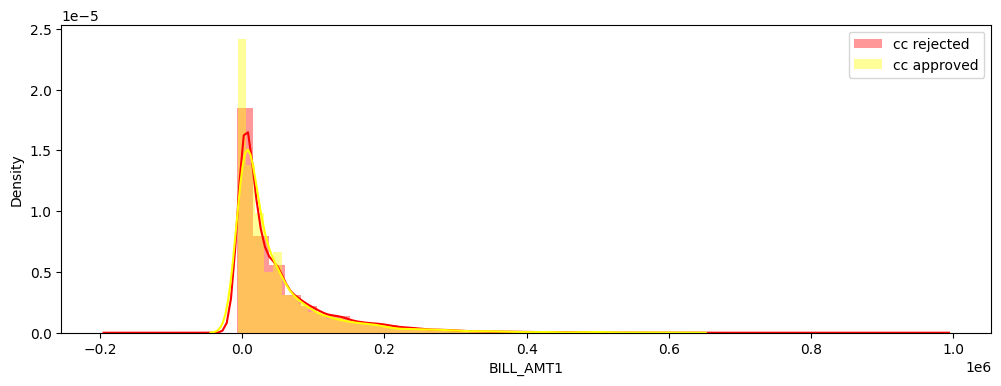

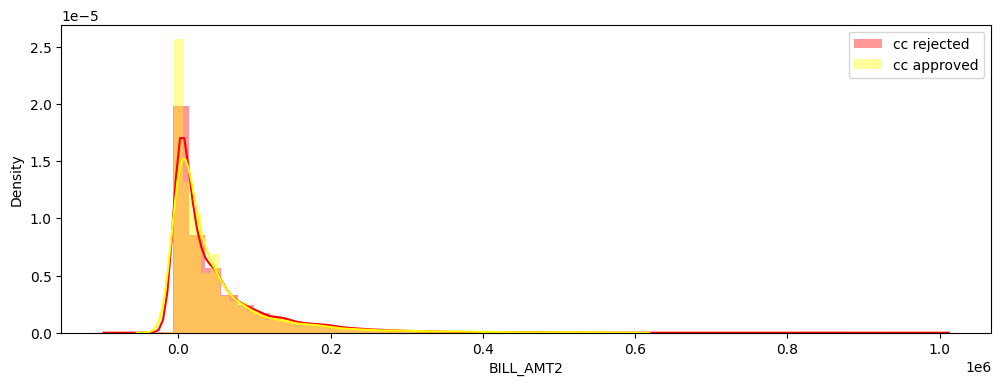

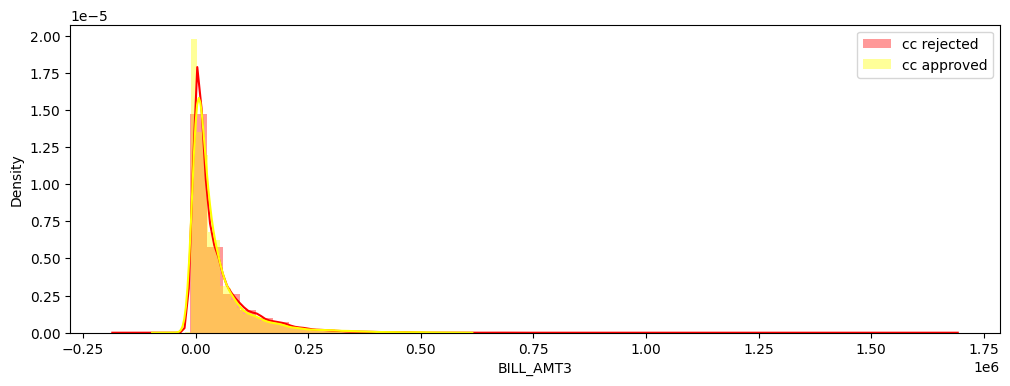

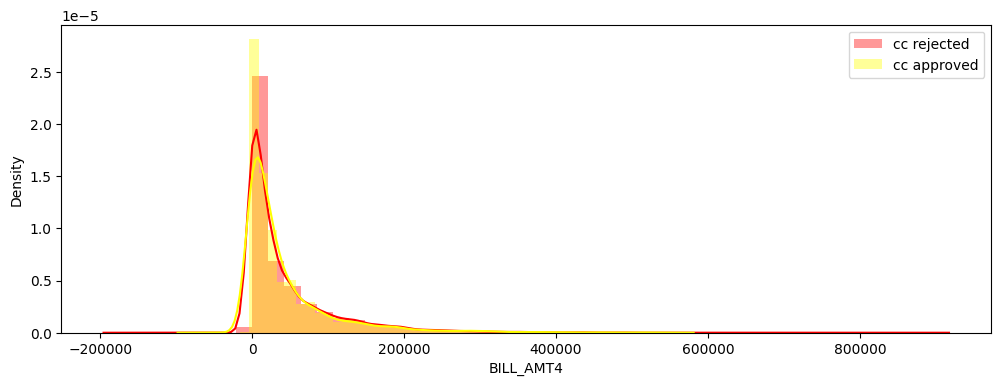

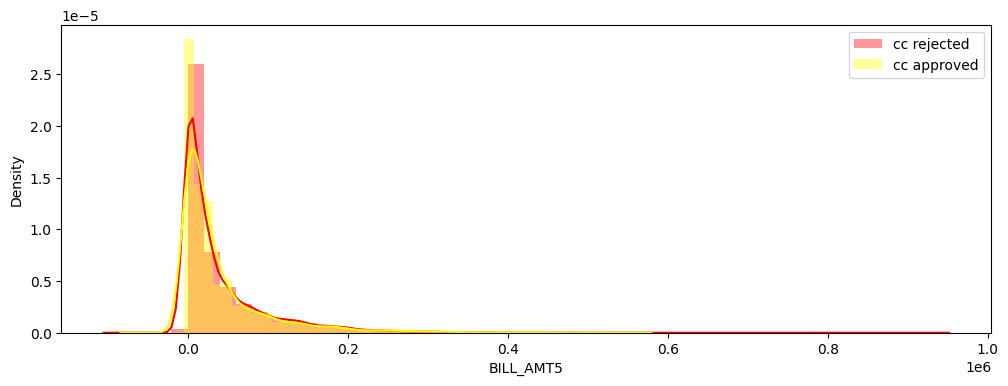

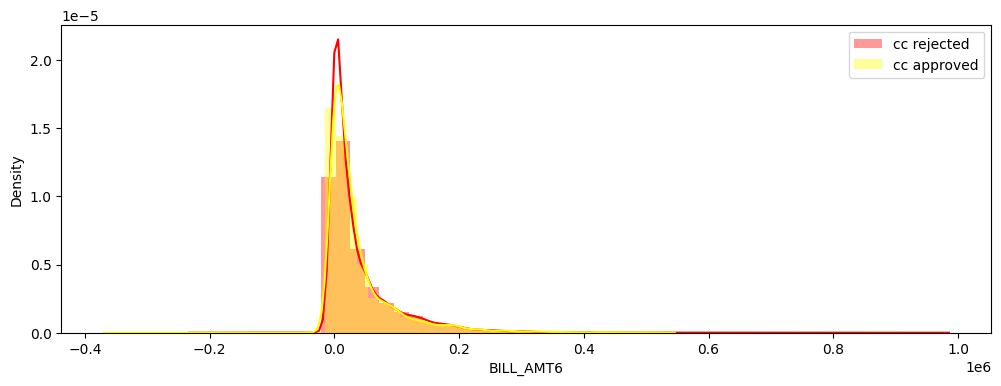

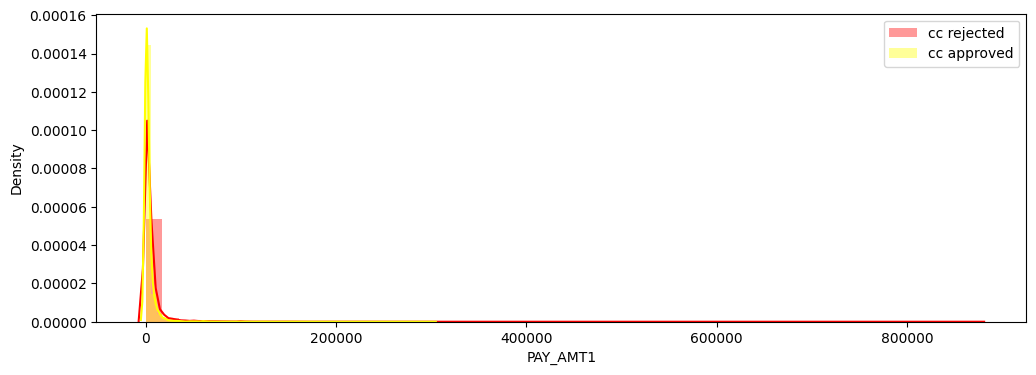

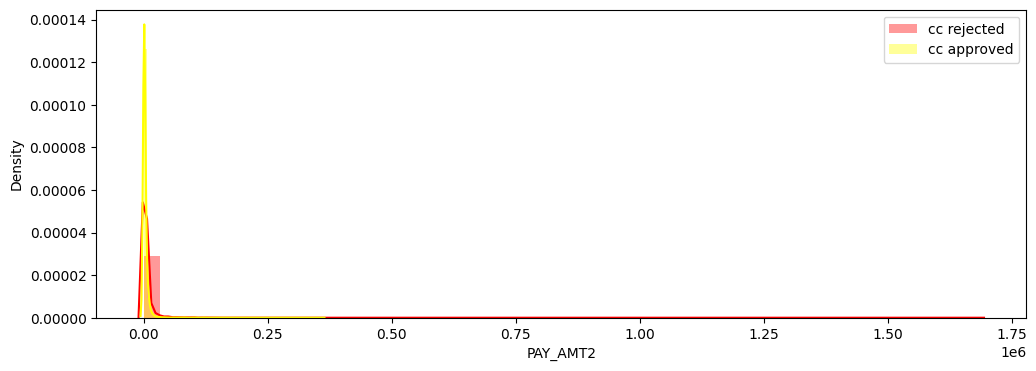

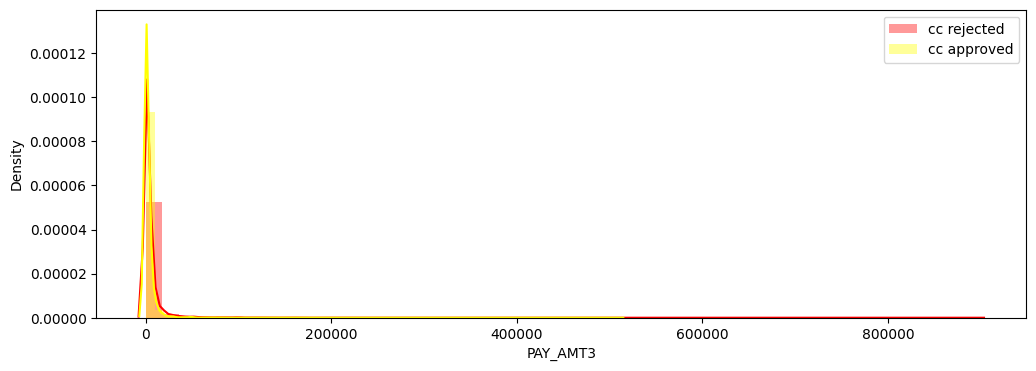

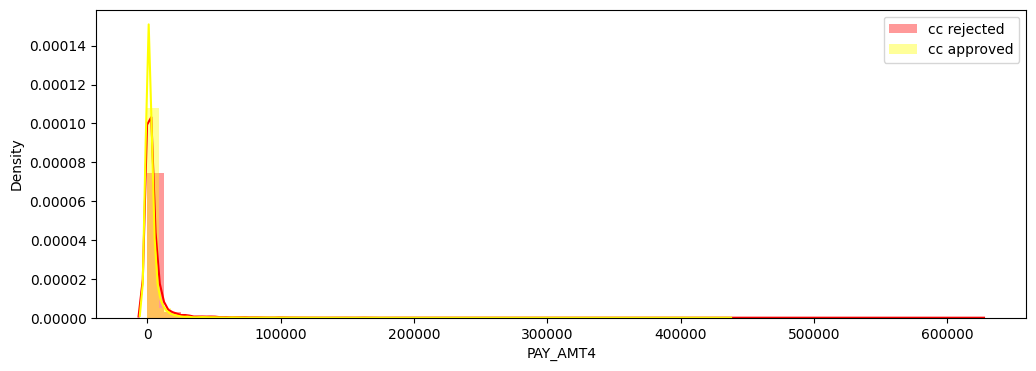

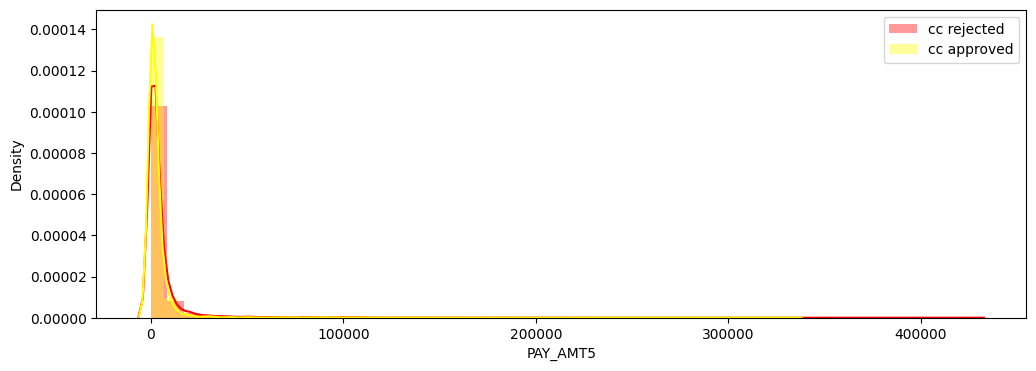

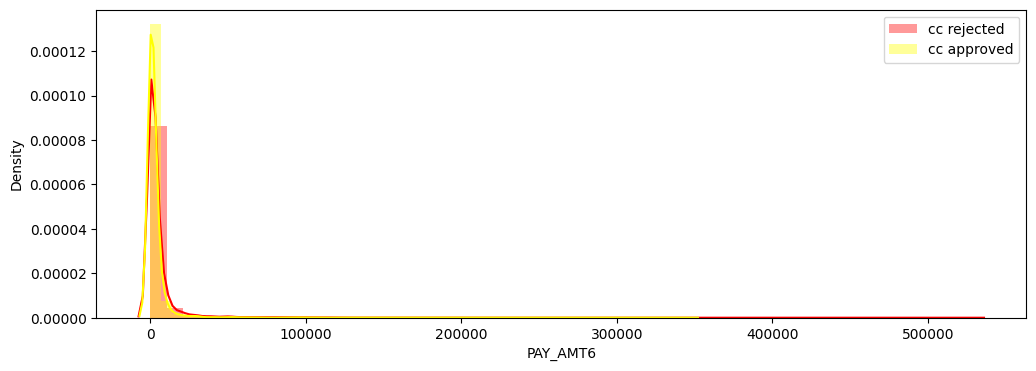

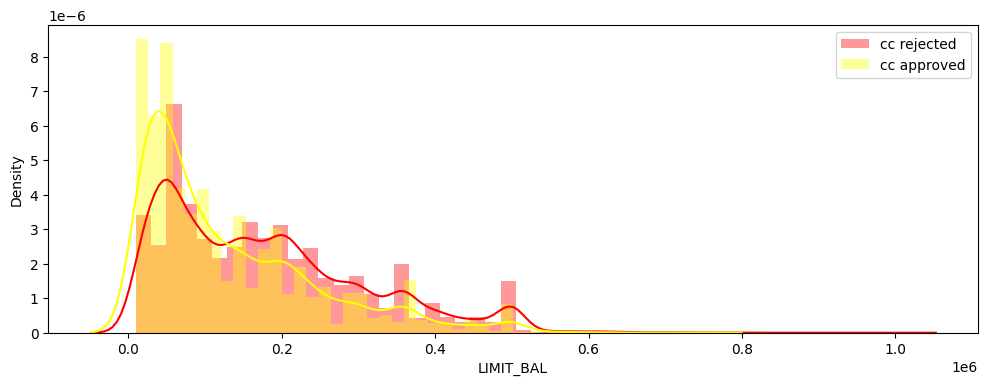

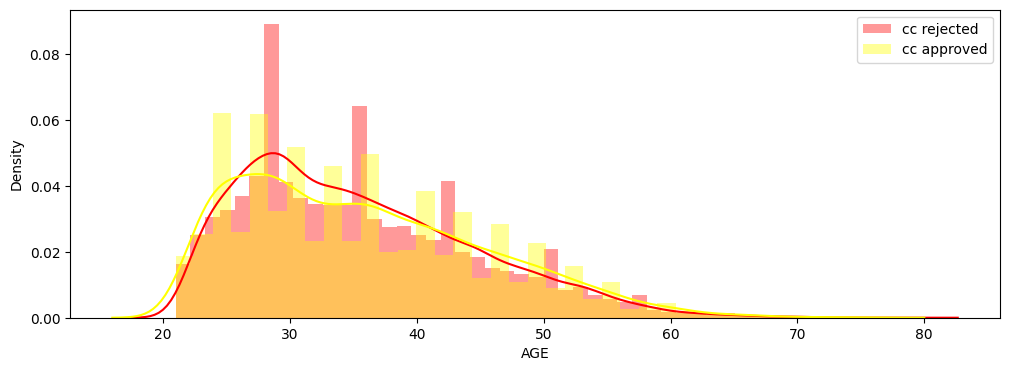

In [6]:
#dividing features into categorical and numerical ones

cat_features = ['SEX','EDUCATION','MARRIAGE','PAY_0', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
num_features= ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6','LIMIT_BAL','AGE']
target=['default payment next month']

for n in num_features:
    plt.figure(figsize=(12,4))
    sns.distplot(train_df.loc[train_df['default payment next month']==0,n], kde=True, color='red',label ='cc rejected')
    sns.distplot(train_df.loc[train_df['default payment next month']==1,n], kde=True, color='yellow',label ='cc approved')
    plt.legend(loc='upper right')
    plt.show

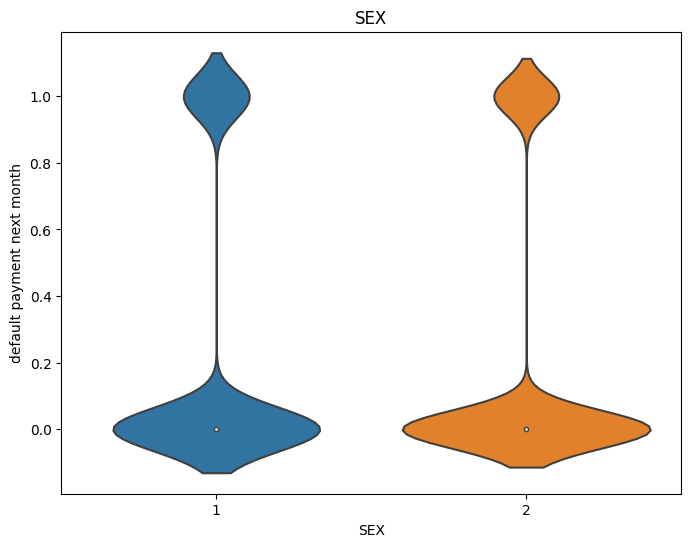

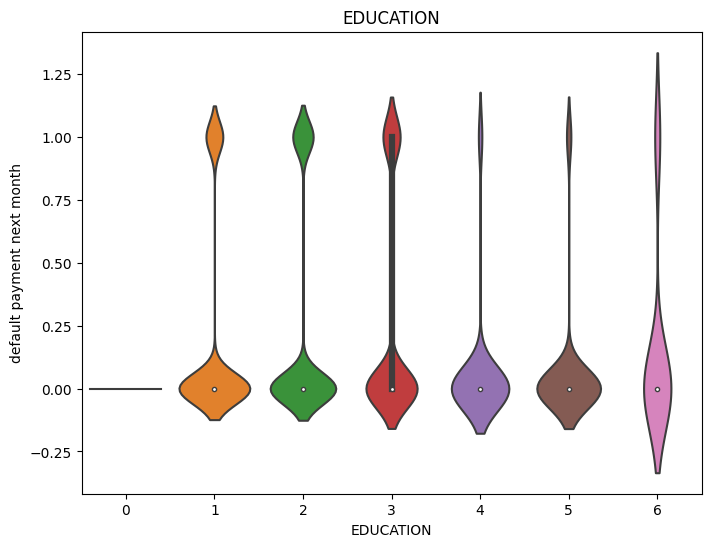

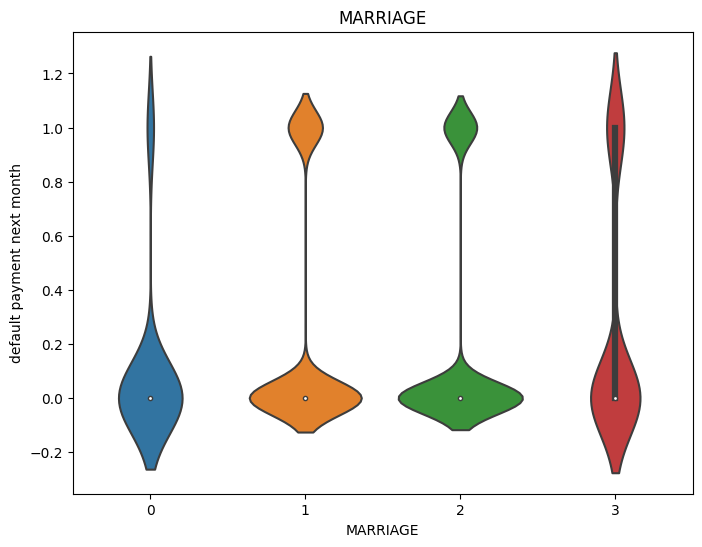

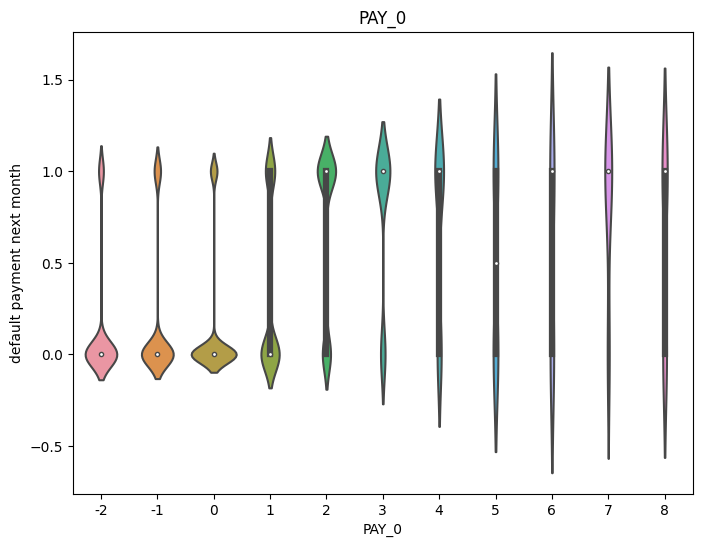

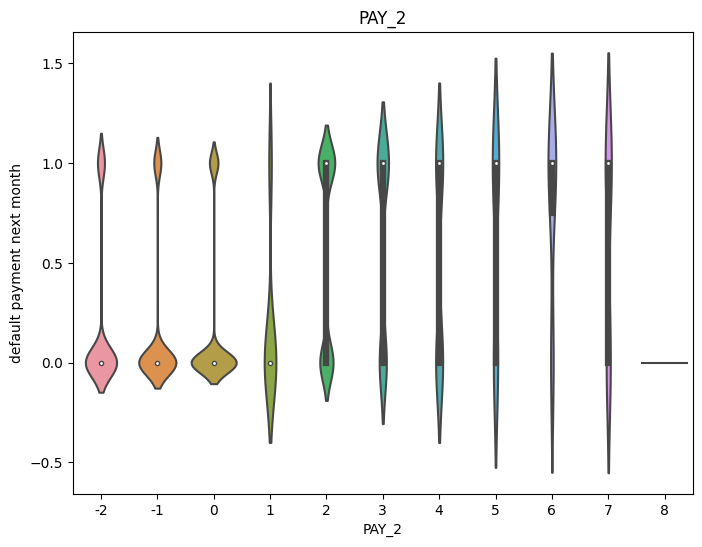

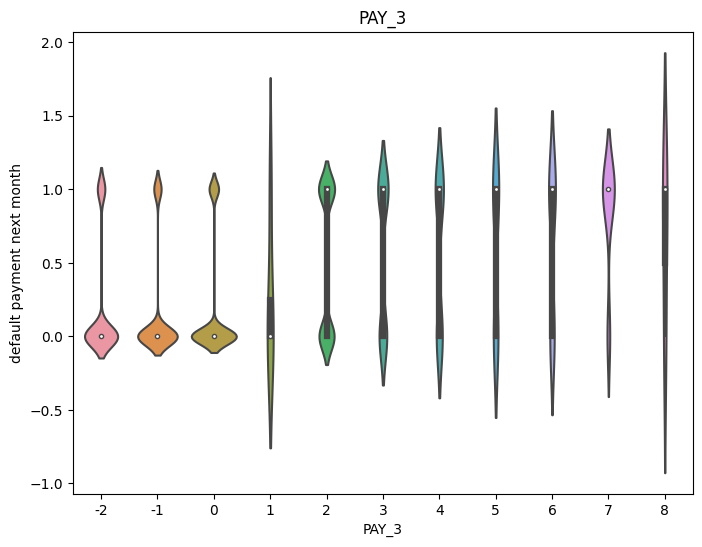

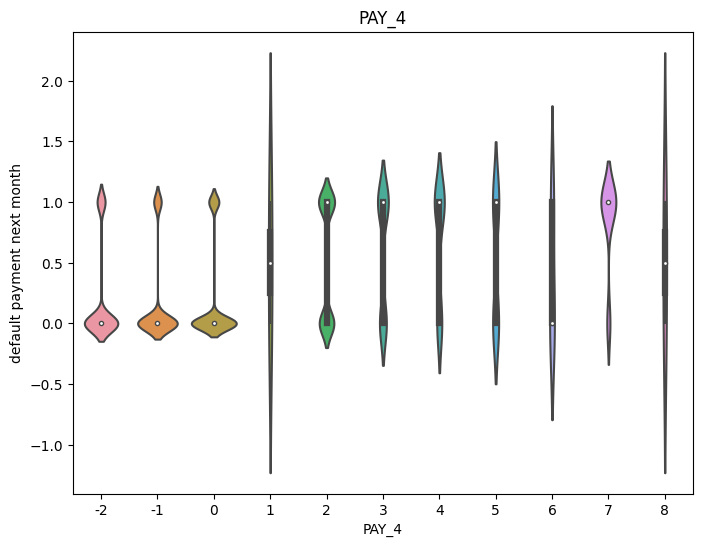

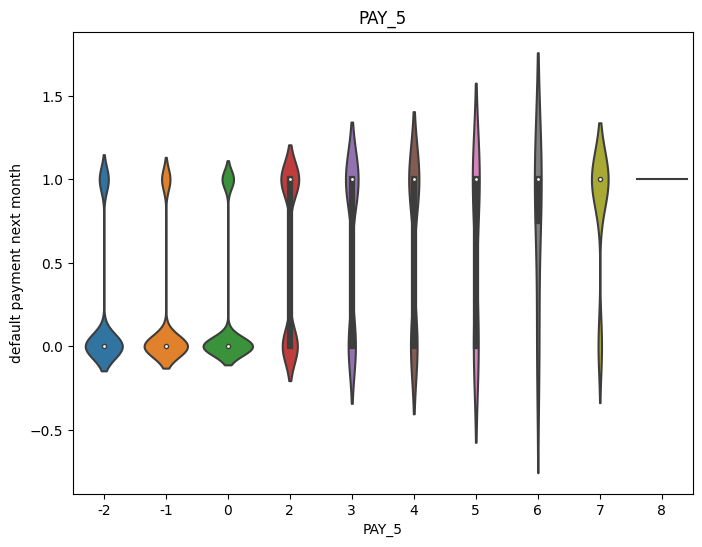

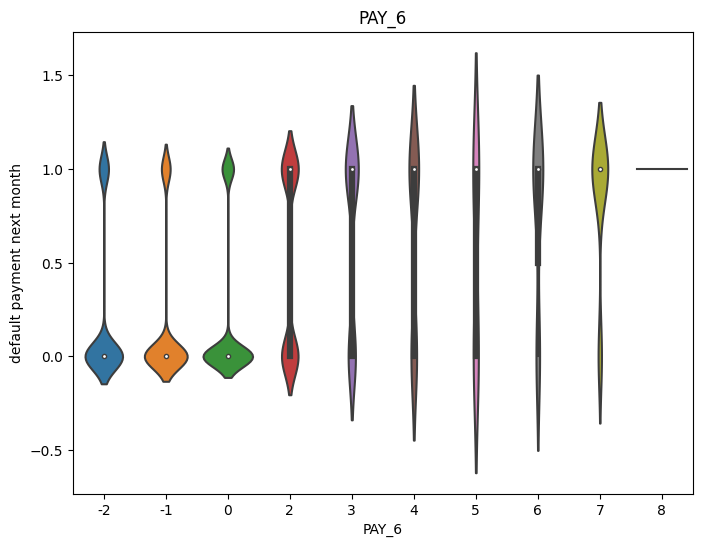

In [7]:
for n in cat_features:
    plt.figure(figsize=(8,6))
    sns.violinplot(y=train_df['default payment next month'],x=train_df[n])
    plt.title(n)
    plt.show()

It seems that the numerical variables don't explain the target well, maybe except for the 'Limit_Bal'. The categorical features give us better understanding whether the credit card will be granted or not. In general, it is more likely to grant a credit card, when the repayment delay is long (two months and longer), and less likely when the repayment is done on time. Also, the higher the limit balance, the more likely that a credit card will be denied.

All 'PAY...' features are integers, but they're categories indeed, so let's replace them with wordings.

In [8]:
train_df['PAY_0'].replace({-2:'no dues',-1:'paid duly',0:'?',1:'paid within 1m', 2:'paid within 2m',3:'paid within 3m',4:'paid within 4m',5:'paid within 5m',
                                                                      6:'paid within 6m',7:'paid within 7m',8:'paid within 8m'},inplace=True)

In [9]:
train_df['PAY_2'].replace({-2:'no dues',-1:'paid duly',0:'?',1:'paid within 1m', 2:'paid within 2m',3:'paid within 3m',4:'paid within 4m',5:'paid within 5m',
                                                                      6:'paid within 6m',7:'paid within 7m',8:'paid within 8m'},inplace=True)

In [10]:
train_df['PAY_3'].replace({-2:'no dues',-1:'paid duly',0:'?',1:'paid within 1m', 2:'paid within 2m',3:'paid within 3m',4:'paid within 4m',5:'paid within 5m',
                                                                      6:'paid within 6m',7:'paid within 7m',8:'paid within 8m'},inplace=True)

In [11]:
train_df['PAY_4'].replace({-2:'no dues',-1:'paid duly',0:'?',1:'paid within 1m', 2:'paid within 2m',3:'paid within 3m',4:'paid within 4m',5:'paid within 5m',
                                                                      6:'paid within 6m',7:'paid within 7m',8:'paid within 8m'},inplace=True)

In [12]:
train_df['PAY_5'].replace({-2:'no dues',-1:'paid duly',0:'?',1:'paid within 1m', 2:'paid within 2m',3:'paid within 3m',4:'paid within 4m',5:'paid within 5m',
                                                                      6:'paid within 6m',7:'paid within 7m',8:'paid within 8m'},inplace=True)

In [13]:
train_df['PAY_6'].replace({-2:'no dues',-1:'paid duly',0:'?',1:'paid within 1m', 2:'paid within 2m',3:'paid within 3m',4:'paid within 4m',5:'paid within 5m',
                                                                      6:'paid within 6m',7:'paid within 7m',8:'paid within 8m'},inplace=True)

In [14]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,paid within 2m,paid within 2m,paid duly,paid duly,no dues,no dues,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,paid duly,paid within 2m,?,?,?,paid within 2m,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,?,?,?,?,?,?,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,?,?,?,?,?,?,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,paid duly,?,paid duly,?,?,?,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


<Axes: xlabel='PAY_AMT6', ylabel='BILL_AMT6'>

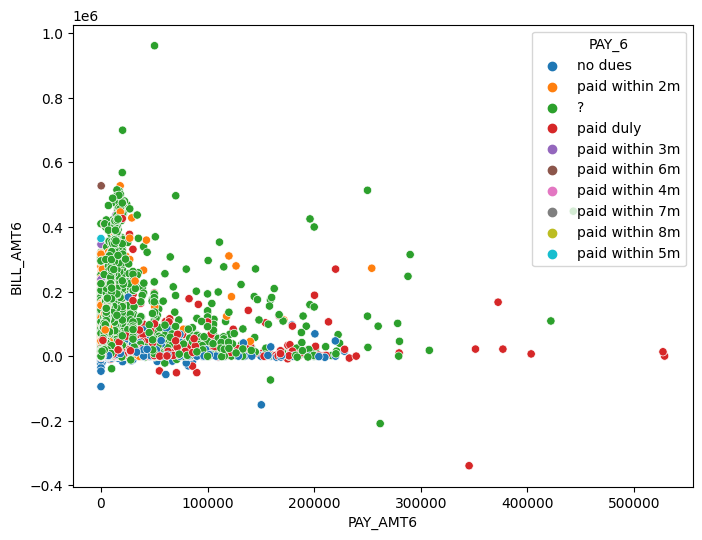

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df['PAY_AMT6'],y=train_df['BILL_AMT6'],hue=train_df['PAY_6'])

<Axes: xlabel='PAY_AMT5', ylabel='BILL_AMT5'>

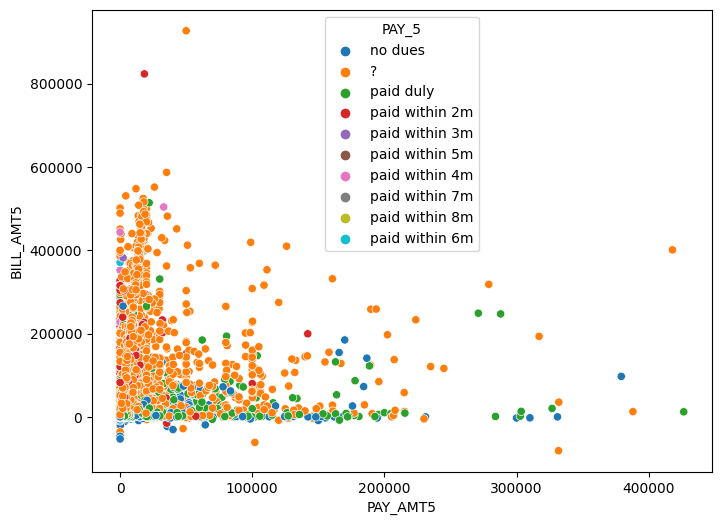

In [16]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df['PAY_AMT5'],y=train_df['BILL_AMT5'],hue=train_df['PAY_5'])

<Axes: xlabel='PAY_AMT4', ylabel='BILL_AMT4'>

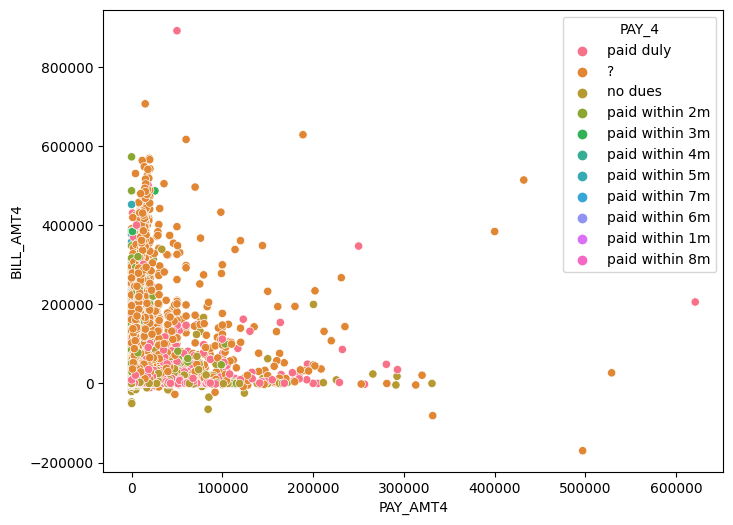

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df['PAY_AMT4'],y=train_df['BILL_AMT4'],hue=train_df['PAY_4'])

<Axes: xlabel='PAY_AMT3', ylabel='BILL_AMT3'>

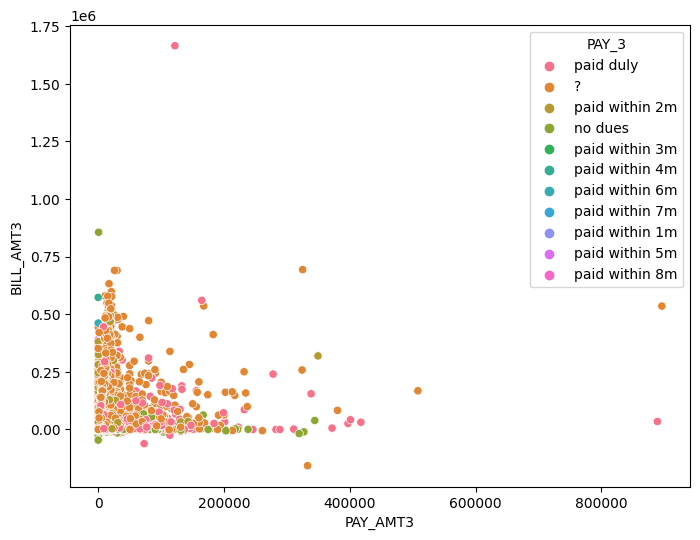

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df['PAY_AMT3'],y=train_df['BILL_AMT3'],hue=train_df['PAY_3'])

<Axes: xlabel='PAY_AMT2', ylabel='BILL_AMT2'>

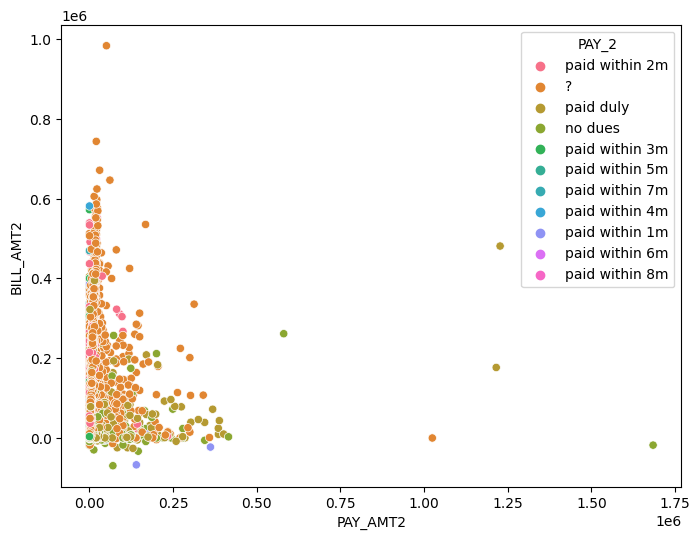

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df['PAY_AMT2'],y=train_df['BILL_AMT2'],hue=train_df['PAY_2'])

<Axes: xlabel='PAY_AMT1', ylabel='BILL_AMT1'>

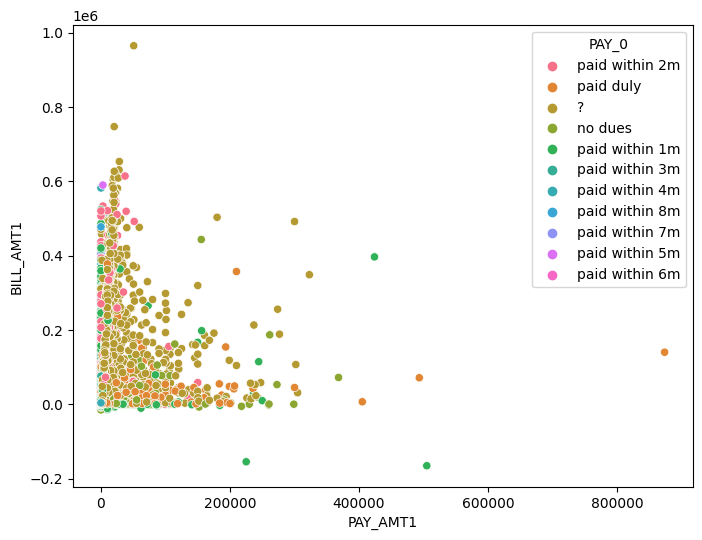

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=train_df['PAY_AMT1'],y=train_df['BILL_AMT1'],hue=train_df['PAY_0'])

All features 'PAY...' have two values that aren't included in the dataset description, i.e. 0 and -2. Therefore, we should assume some explanations for these values or replace them properly. However, more important is the fact that the values of all 'PAY...' features aren't assigned correctly. For example, in some cases although 'BILL_AMT' is 0, the corresponding 'PAY_AMT' values aren't always 0 and they should be if the 'BILL_AMT' is a balance carried forward (and basing on the numbers this assumption is correct) and the 'PAY...' value should be 'no dues'. Hence, we have to correct the ranks in 'PAY...' features.
Above comment takes into consideration the assumption that the billed amount should be paid within the same month (which is usually the case for credit card repayments), but the best solution would be to get the confirmation of it (but we can't have it, because it isn't available in the data description).
As we don't know the previous history of the payments and billed amounts, it is decided to replace all 'PAY...' features with two values '0' if paid duly or no dues or '1' if the payment is delayed, basing on two conditions: billed amount is higher than the paid amount -> value 1, billed amount lower than the paid amount -> value 1. This solution seems fine, because it looks like there are many errors in the original data for all 'PAY...' features.

In [23]:
train_df['PAY_0']=np.where(train_df['BILL_AMT1']>train_df['PAY_AMT1'],1,0)
train_df['PAY_2']=np.where(train_df['BILL_AMT2']>train_df['PAY_AMT2'],1,0)
train_df['PAY_3']=np.where(train_df['BILL_AMT3']>train_df['PAY_AMT3'],1,0)
train_df['PAY_4']=np.where(train_df['BILL_AMT4']>train_df['PAY_AMT4'],1,0)
train_df['PAY_5']=np.where(train_df['BILL_AMT5']>train_df['PAY_AMT5'],1,0)
train_df['PAY_6']=np.where(train_df['BILL_AMT6']>train_df['PAY_AMT6'],1,0)

In [27]:
train_df['SEX'].replace(2,0,inplace=True)

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

X=train_df.drop(['ID','default payment next month'],axis=1)
y=train_df[["default payment next month"]]

scaler=StandardScaler()
abc=AdaBoostClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, stratify=y, random_state=42)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

rfc={'n_estimators':[300,400,500,700,1000]}
parameter_search=GridSearchCV(estimator=abc,param_grid=rfc,scoring='f1_macro')
parameter_search.fit(X_train, y_train)
print("The best parameters are:", parameter_search.best_params_)
model=parameter_search.best_estimator_
print(model.score(X_train,y_train))

C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\pfali\Desktop\Pyton\Venv\Lib\Kaggle\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was 

The best parameters are: {'n_estimators': 1000}
0.7974666666666667
